In [20]:
 # Практика

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем данные

In [22]:
import pandas as pd

In [23]:
movies = pd.read_csv('../data/ml-latest-small/movies.csv')

In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
tags = pd.read_csv('../data/ml-latest-small/tags.csv')

In [26]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Получите гистограмму количества тегов на фильм/пользователя

In [27]:
tags_per_user = tags.groupby('userId')[['tag']].count()

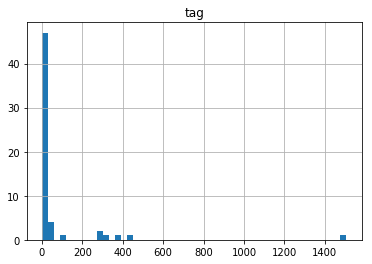

In [28]:
tags_per_user.hist(bins=50)
plt.show()

In [29]:
tags_per_user.sort_values('tag', ascending=False)

,tag
userId,
474,1507
567,432
62,370
599,323
477,280
424,273
537,100
125,48
357,45


In [30]:
tags[tags['userId'] == 567].groupby('movieId')[['tag']].count().sort_values('tag', ascending=False)

,tag
movieId,
7361,24
4144,18
3676,16
71899,13
4878,13
1921,12
5673,12
27773,8
56782,8


In [31]:
tags[tags['userId'] == 567].groupby('tag')[['movieId']].count().sort_values('movieId', ascending=False)

,movieId
tag,
atmospheric,20
quirky,13
surreal,12
visually appealing,12
thought-provoking,11
emotional,10
bittersweet,9
dreamlike,9
heartwarming,8


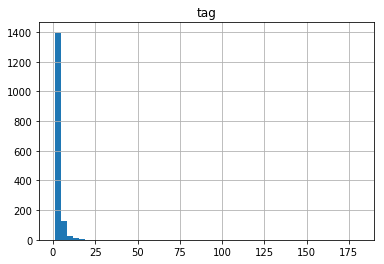

In [32]:
tags_per_movie = tags.groupby('movieId')[['tag']].count()
tags_per_movie.hist(bins=50)
plt.show()

In [33]:
tags_per_movie.sort_values('tag', ascending=False).head()

,tag
movieId,
296,181
2959,54
924,41
293,35
7361,34


## Получите график количества тегов по месяцам

In [34]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [35]:
from datetime import datetime

In [36]:
def parse_datetime(r):
    return datetime.utcfromtimestamp(r['timestamp'])

In [37]:
dt = datetime.utcfromtimestamp(1445714994)

In [38]:
## PYTHON LAMBDA

In [39]:
tags['dt'] = tags.apply(parse_datetime, axis=1)

In [40]:
tags.head()

,userId,movieId,tag,timestamp,dt
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [41]:
tags['dt_ym'] = tags.apply(lambda r: '{}-{:02d}'.format(r['dt'].year, r['dt'].month), axis=1)

In [42]:
tags.head()

,userId,movieId,tag,timestamp,dt,dt_ym
0,2,60756,funny,1445714994,2015-10-24 19:29:54,2015-10
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56,2015-10
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52,2015-10
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27,2015-10
4,2,89774,MMA,1445715200,2015-10-24 19:33:20,2015-10


In [43]:
tpm = tags.groupby('dt_ym')[['tag']].count()
tpm

,tag
dt_ym,
2006-01,1462
2006-02,39
2006-03,13
2006-04,7
2006-06,1
2006-08,1
2006-10,9
2006-11,1
2007-01,1


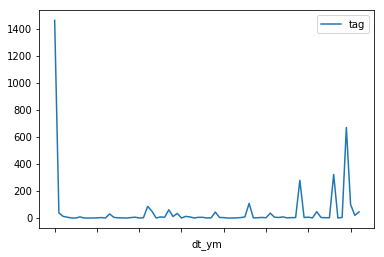

In [44]:
tpm.plot()
plt.show()

In [45]:
tpm.sort_values('tag', ascending=False)

,tag
dt_ym,
2006-01,1462
2018-05,670
2017-06,323
2016-03,280
2015-02,109
2018-06,101
2009-05,87
2010-01,62
2009-06,52


In [46]:
tags[tags['dt_ym'] == '2006-01'].groupby('userId')[['tag']].count().sort_values('tag', ascending=False).head()

,tag
userId,
474,1462


## Получите гистограмму количества жанров на фильм

In [47]:
movies['genres_split'] = movies.genres.str.split('|')

In [48]:
movies['genres_cnt'] = movies.apply(lambda r: len(r['genres_split']), axis=1)

In [49]:
movies.head()

,movieId,title,genres,genres_split,genres_cnt
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


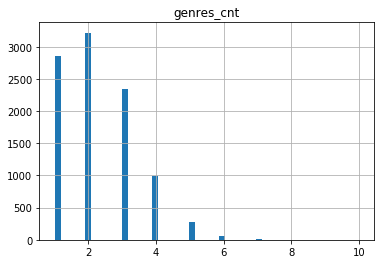

In [50]:
movies[['genres_cnt']].hist(bins=50)
plt.show()

## TFIDF на жанрах

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [52]:
movies['genres_space'] = movies.apply(lambda r: ' '.join(r['genres_split']), axis=1)

In [53]:
movies.head()

,movieId,title,genres,genres_split,genres_cnt,genres_space
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1,Comedy


In [54]:
cnt_vec = CountVectorizer()

In [55]:
processed = cnt_vec.fit_transform(movies['genres_space'])

In [56]:
tfidf = TfidfTransformer()

In [57]:
tfidf_dense = tfidf.fit_transform(processed).todense()

In [58]:
tfidf_dense.shape

(9742, 24)

In [59]:
cnt_vec.vocabulary_

{'adventure': 1,
 'animation': 2,
 'children': 3,
 'comedy': 4,
 'fantasy': 8,
 'romance': 19,
 'drama': 7,
 'action': 0,
 'crime': 5,
 'thriller': 21,
 'horror': 12,
 'mystery': 16,
 'sci': 20,
 'fi': 9,
 'war': 22,
 'musical': 15,
 'documentary': 6,
 'imax': 13,
 'western': 23,
 'film': 10,
 'noir': 18,
 'no': 17,
 'genres': 11,
 'listed': 14}

In [60]:
columns = [None for i in range(len(cnt_vec.vocabulary_))]
for k in cnt_vec.vocabulary_:
    columns[cnt_vec.vocabulary_[k]] = k

In [61]:
df_tfidf = pd.DataFrame(tfidf_dense, columns=columns)

In [62]:
df_tfidf.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [63]:
movies_with_tfidf = pd.concat((movies, df_tfidf), axis=1)

In [64]:
movies_with_tfidf.head()

,movieId,title,genres,genres_split,genres_cnt,genres_space,action,adventure,animation,children,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,Adventure Animation Children Comedy Fantasy,0.0,0.416846,0.516225,0.504845,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,Adventure Children Fantasy,0.0,0.512361,0.000000,0.620525,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2,Comedy Romance,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3,Comedy Drama Romance,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1,Comedy,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [65]:
import re

In [66]:
re.findall(r'\(([0-9]{4})\)', 'Toy Story (1995)')[0]

'1995'

In [67]:
movies_with_tfidf['year'] = movies_with_tfidf.apply(lambda r: int(re.findall(r'\(([0-9]{4})\)', r['title'])[0]) if len(re.findall(r'\(([0-9]{4})\)', r['title'])) else None, axis=1)

In [68]:
movies_with_tfidf['year'] = movies_with_tfidf['year'].fillna(2002)

In [69]:
movies_with_tfidf.columns

Index(['movieId', 'title', 'genres', 'genres_split', 'genres_cnt',
       'genres_space', 'action', 'adventure', 'animation', 'children',
       'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film',
       'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'no',
       'noir', 'romance', 'sci', 'thriller', 'war', 'western', 'year'],
      dtype='object')

In [70]:
fc = ['movieId', 'title', 'genres_cnt', 'action', 'adventure', 'animation', 'children',
       'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film',
        'horror', 'imax', 'listed', 'musical', 'mystery', 'no',
       'noir', 'romance', 'sci', 'thriller', 'war', 'western', 'year']

In [71]:
movies_for_ds = movies_with_tfidf[fc]

In [72]:
movies_for_ds

,movieId,title,genres_cnt,action,adventure,animation,children,comedy,crime,documentary,...,musical,mystery,no,noir,romance,sci,thriller,war,western,year
0,1,Toy Story (1995),5,0.000000,0.416846,0.516225,0.504845,0.267586,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1995.0
1,2,Jumanji (1995),3,0.000000,0.512361,0.000000,0.620525,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1995.0
2,3,Grumpier Old Men (1995),2,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.821009,0.000000,0.000000,0.0,0.0,1995.0
3,4,Waiting to Exhale (1995),3,0.000000,0.000000,0.000000,0.000000,0.505015,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.726241,0.000000,0.000000,0.0,0.0,1995.0
4,5,Father of the Bride Part II (1995),1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1995.0
5,6,Heat (1995),3,0.549328,0.000000,0.000000,0.000000,0.000000,0.635947,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.542042,0.0,0.0,1995.0
6,7,Sabrina (1995),2,0.000000,0.000000,0.000000,0.000000,0.570915,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.821009,0.000000,0.000000,0.0,0.0,1995.0
7,8,Tom and Huck (1995),2,0.000000,0.636699,0.000000,0.771112,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1995.0
8,9,Sudden Death (1995),1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1995.0
9,10,GoldenEye (1995),3,0.553065,0.629522,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.545730,0.0,0.0,1995.0


## CBRS For User

In [73]:
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')

In [74]:
movies_with_ratings = pd.merge(ratings, movies_for_ds, on='movieId')

In [75]:
movies_with_ratings.head()

,userId,movieId,rating,timestamp,title,genres_cnt,action,adventure,animation,children,...,musical,mystery,no,noir,romance,sci,thriller,war,western,year
0,1,1,4.0,964982703,Toy Story (1995),5,0.0,0.416846,0.516225,0.504845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
1,5,1,4.0,847434962,Toy Story (1995),5,0.0,0.416846,0.516225,0.504845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
2,7,1,4.5,1106635946,Toy Story (1995),5,0.0,0.416846,0.516225,0.504845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
3,15,1,2.5,1510577970,Toy Story (1995),5,0.0,0.416846,0.516225,0.504845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
4,17,1,4.5,1305696483,Toy Story (1995),5,0.0,0.416846,0.516225,0.504845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0


In [76]:
ratings.groupby('userId')[['movieId']].count().sort_values('movieId', ascending=False).head()

,movieId
userId,
414,2698
599,2478
474,2108
448,1864
274,1346


In [77]:
movies_with_ratings.groupby('userId')[['title']].count().sort_values('title', ascending=False).head()

,title
userId,
414,2698
599,2478
474,2108
448,1864
274,1346


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [79]:
import numpy as np

In [80]:
TARGET_USER = 474

In [81]:
df_for_user = movies_with_ratings[movies_with_ratings['userId']==TARGET_USER]

In [82]:
X, y = df_for_user[[
       'action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'listed', 'musical', 'mystery', 'no', 'noir', 'romance', 'sci',
       'thriller', 'war', 'western']], df_for_user['rating']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
models = [LinearRegression, Lasso, Ridge, RandomForestRegressor, SVR]

In [86]:
for m in models:
    model = m()
    model.fit(X_train, y_train)
    print("{}. r2_train: {:.4f}, r2_test: {:.4f}, mae_train: {:.4f}, mae_test: {:.4f}".format(
        m.__name__, model.score(X_train ,y_train), model.score(X_test, y_test),
        mean_absolute_error(model.predict(X_train), y_train),
        mean_absolute_error(model.predict(X_test), y_test)
    ))

LinearRegression. r2_train: 0.1229, r2_test: 0.0883, mae_train: 0.6103, mae_test: 0.6046
Lasso. r2_train: 0.0000, r2_test: -0.0037, mae_train: 0.6376, mae_test: 0.6139
Ridge. r2_train: 0.1233, r2_test: 0.0893, mae_train: 0.6107, mae_test: 0.6053
RandomForestRegressor. r2_train: 0.3075, r2_test: -0.0374, mae_train: 0.5294, mae_test: 0.6359


/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR. r2_train: 0.1765, r2_test: 0.0662, mae_train: 0.5568, mae_test: 0.5978


## Item 2 Item

In [87]:
from sklearn.neighbors import NearestNeighbors

In [88]:
movies_for_ds.columns

Index(['movieId', 'title', 'genres_cnt', 'action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi',
       'film', 'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western', 'year'],
      dtype='object')

In [89]:
cl = ['action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi',
       'film', 'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western']

In [90]:
X_unsup= movies_for_ds[cl]

In [91]:
nn = NearestNeighbors(n_neighbors=10, metric='minkowski', p=2)

In [92]:
nn.fit(X_unsup)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [93]:
movies_for_ds[movies_for_ds['movieId'] == 188751]

,movieId,title,genres_cnt,action,adventure,animation,children,comedy,crime,documentary,...,musical,mystery,no,noir,romance,sci,thriller,war,western,year
9715,188751,Mamma Mia: Here We Go Again! (2018),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,2018.0


In [94]:
nn.kneighbors(movies_for_ds[movies_for_ds['movieId'] == 188751][cl])

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[566,  60, 203,   2, 216, 727, 482, 394, 103, 315]]))

In [95]:
neigbors = nn.kneighbors(movies_for_ds[movies_for_ds['movieId'] == 188751][cl])[1]

In [96]:
neigbors.reshape(-1)

array([566,  60, 203,   2, 216, 727, 482, 394, 103, 315])

In [97]:
movies_for_ds.iloc[neigbors.reshape(-1)]

,movieId,title,genres_cnt,action,adventure,animation,children,comedy,crime,documentary,...,musical,mystery,no,noir,romance,sci,thriller,war,western,year
566,691,Mrs. Winterbourne (1996),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1996.0
60,68,French Twist (Gazon maudit) (1995),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1995.0
203,237,Forget Paris (1995),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1995.0
2,3,Grumpier Old Men (1995),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1995.0
216,252,I.Q. (1994),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1994.0
727,947,My Man Godfrey (1936),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1936.0
482,550,Threesome (1994),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1994.0
394,453,For Love or Money (1993),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1993.0
103,118,If Lucy Fell (1996),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1996.0
315,357,Four Weddings and a Funeral (1994),2,0.0,0.0,0.0,0.0,0.570915,0.0,0.0,...,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0,1994.0
